In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [93]:
from sklearn import datasets

dataset = datasets.fetch_california_housing()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target'>

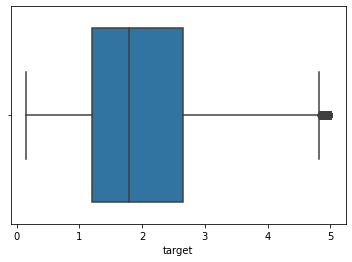

In [94]:
sns.boxplot(df.target)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Population'>

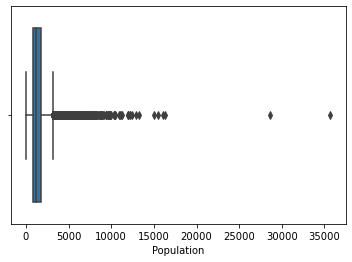

In [95]:
sns.boxplot(df.Population)

In [96]:
df.target.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: target, dtype: float64

In [97]:
df.HouseAge.describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: HouseAge, dtype: float64

In [98]:
# HouseAge 변수에서 최대값이 포함된 인덱스 추출
np.argmax(df['HouseAge'])

2

In [99]:
df.iloc[2]

MedInc          7.257400
HouseAge       52.000000
AveRooms        8.288136
AveBedrms       1.073446
Population    496.000000
AveOccup        2.802260
Latitude       37.850000
Longitude    -122.240000
target          3.521000
Name: 2, dtype: float64

# 이상치를 제거하지 않는 방법

In [100]:
df_sp = df[['HouseAge', 'AveRooms', 'AveBedrms', 'target']]

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_sp.drop('target',axis=1), df_sp['target'], test_size=0.3, random_state=50)

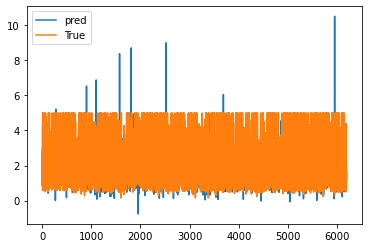

In [102]:
fit_train1 = sm.OLS(y_train, X_train)
fit_train1 = fit_train1.fit()

# 예측한 값
plt.plot(np.array(fit_train1.predict(X_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [103]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(X_test))
print(mse1)

1.2603728837085943


# HouseAge 이상치 제거하는 방법

In [104]:
Q1 = df_sp['AveBedrms'].quantile(0.25)
Q3 = df_sp['AveBedrms'].quantile(0.75)
IQR = Q3-Q1
rev_range = 3
filter1 = (df_sp['AveBedrms'] >= Q1 - rev_range*IQR) & (df_sp['AveBedrms'] <=Q3 + rev_range*IQR)

In [105]:
df_sp_rmv = df_sp.loc[filter1]

In [106]:
df_sp_rmv

,HouseAge,AveRooms,AveBedrms,target
0,41.0,6.984127,1.023810,4.526
1,21.0,6.238137,0.971880,3.585
2,52.0,8.288136,1.073446,3.521
3,52.0,5.817352,1.073059,3.413
4,52.0,6.281853,1.081081,3.422
...,...,...,...,...
20635,25.0,5.045455,1.133333,0.781
20636,18.0,6.114035,1.315789,0.771
20637,17.0,5.205543,1.120092,0.923
20638,18.0,5.329513,1.171920,0.847


In [107]:
# 이상치 제거하기
def replace_outlier(value):
    Q1 = df_sp['AveBedrms'].quantile(0.25)
    Q3 = df_sp['AveBedrms'].quantile(0.75)
    IQR = Q3-Q1
    rev_range = 3

    if((value <(Q1-rev_range*IQR))):
        value = np.nan
    if((value >(Q3+rev_range*IQR))):
        value = np.nan
    return value

df_sp['AveBedrms'] = df_sp['AveBedrms'].apply(replace_outlier)

<ipython-input-107-46f4342ec063>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['AveBedrms'] = df_sp['AveBedrms'].apply(replace_outlier)


In [108]:
df_sp.isna().sum()

HouseAge       0
AveRooms       0
AveBedrms    724
target         0
dtype: int64

In [109]:
# 이상치 제거 후 분석
df_sp2=df_sp.dropna()

In [110]:
df_sp2

,HouseAge,AveRooms,AveBedrms,target
0,41.0,6.984127,1.023810,4.526
1,21.0,6.238137,0.971880,3.585
2,52.0,8.288136,1.073446,3.521
3,52.0,5.817352,1.073059,3.413
4,52.0,6.281853,1.081081,3.422
...,...,...,...,...
20635,25.0,5.045455,1.133333,0.781
20636,18.0,6.114035,1.315789,0.771
20637,17.0,5.205543,1.120092,0.923
20638,18.0,5.329513,1.171920,0.847


In [111]:
X_train, X_test, y_train, y_test = train_test_split(df_sp2.drop('target',axis=1), df_sp2['target'], test_size=0.3, random_state=50)

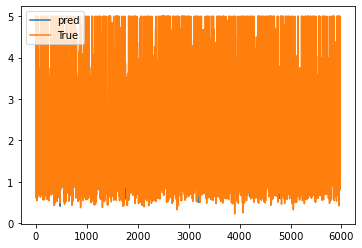

In [112]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fit_train1 = sm.OLS(y_train, X_train)
fit_train1 = fit_train1.fit()

# 예측한 값
plt.plot(np.array(fit_train1.predict(X_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [113]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(X_test))
print(mse2)

1.1037810381413782


# 파생변수 생성

In [136]:
# AveRooms와 AveBedrms 변수 값을 더해 Rooms라는 파생변수 생성
df_sp['Rooms'] = df_sp['AveRooms'] + df_sp['AveBedrms']

<ipython-input-136-6c6aef4b3def>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['Rooms'] = df_sp['AveRooms'] + df_sp['AveBedrms']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Roooms'>

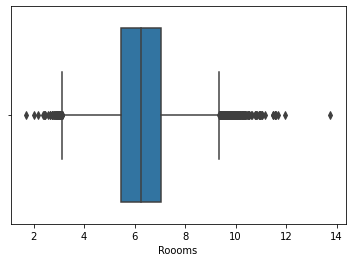

In [137]:
sns.boxplot(df_sp.Roooms)

In [144]:
def saving_outlier(value):
    Q1 = df_sp['Rooms'].quantile(0.25)
    Q3 = df_sp['Rooms'].quantile(0.75)
    IQR = Q3-Q1
    rev_range = 3

    if((value < (Q1 - rev_range*IQR))):
        value = 1
    elif((value > (Q3 + rev_range*IQR))):
        value = 1
    else:
        value = 0
    return value

df_sp_sv['Rooms_sv'] = df_sp['Rooms'].apply(saving_outlier)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(df_sp_sv.drop('target',axis=1), df_sp['target'], test_size=0.3, random_state=50)

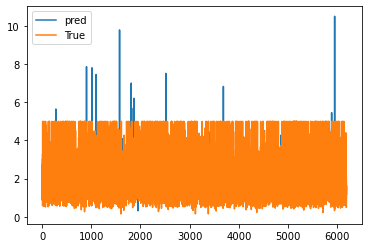

In [146]:
fit_train3 = sm.OLS(y_train, X_train)
fit_train3 = fit_train3.fit()

# 예측한 값
plt.plot(np.array(fit_train3.predict(X_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [147]:
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(y_true = y_test, y_pred = fit_train3.predict(X_test))
print(mse3)

1.35418014259184


# 각 분석 방법의 mse값

In [149]:
print(mse1,'기존 데이터')
print(mse2,'outlier 제거')
print(mse3,'파생변수 추가 + outlier saving')

1.2603728837085943 기존 데이터
1.1037810381413782 outlier 제거
1.35418014259184 파생변수 추가 + outlier saving
